**below code used to install VaderSentiment module**

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
obj = SentimentIntensityAnalyzer()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TCD - TCD.csv')

**below code is to select specified column**

In [ ]:
data = data["Opinion"]

In [ ]:
data.head()

0    Anxiety about social consequences; Appeal to p...
1    Recruitment of Gorkha soldiers will continue u...
2    All petitions related to Agneepath Recruitment...
3    Rajnath Singh - Agneepath: Rajnath Singh will ...
4    Positional Buy cmp 16.80. 12.80% up so far. st...
Name: Opinion, dtype: object

**below code is to analise the pros and cons of data**

In [ ]:

neutral=0
negative=0
positive=0
for i in range(len(data)):
  try:
    
    sentence = data[i]
    if "Justice" or "justice" or "against" or "protest" not in sentence:
     
      sentiment_dict = obj.polarity_scores(sentence)
    
    
      if(sentiment_dict['compound']>0.5):
        positive+=1
        
      elif(sentiment_dict['compound']<0):
        negative+=1
      else:
        neutral+=1
    else:
      negative+=1
  except:
        pass
print("positive :",positive," neutral : ",neutral," negative : ",negative)
  
      

  
  

positive : 11566  neutral :  54141  negative :  18822


**below code is to create a dataframe for visualization**

In [ ]:
import  seaborn as sns
import matplotlib.pyplot as plt
data=pd.DataFrame({
    "type_of_comment":["positive","negative","neutral"],
    "votes":[positive,negative,neutral]
})

data

,type_of_comment,votes
0,positive,11566
1,negative,18822
2,neutral,54141


**below we analised by drawing pie chart and bar graph**

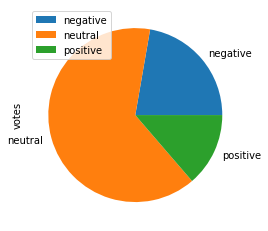

In [ ]:
data.groupby(['type_of_comment']).sum().plot(kind='pie', y='votes')
plt.legend()
plt.show()

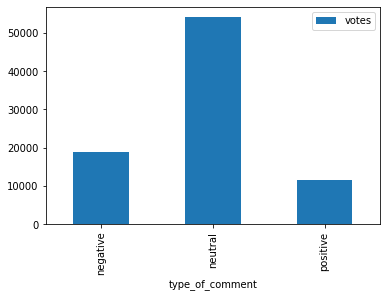

In [ ]:
data.groupby(['type_of_comment']).sum().plot(kind='bar', y='votes')
plt.legend()
plt.show()

In [ ]:
data=data.drop(2)

**we have analised for only positive reviews and negative ones**

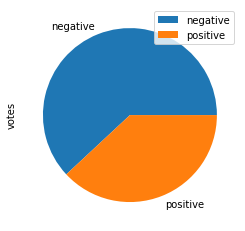

In [ ]:
data.groupby(['type_of_comment']).sum().plot(kind='pie', y='votes')
plt.legend()
plt.show()

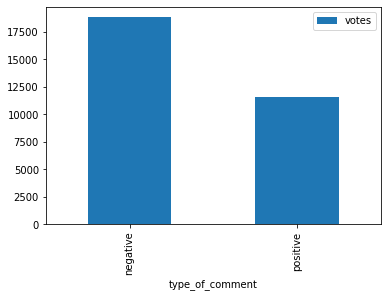

In [ ]:
data.groupby(['type_of_comment']).sum().plot(kind='bar', y='votes')
plt.legend()
plt.show()